In [1]:
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')   

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()
train_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
train_df.isnull().sum()/ len(train_df) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
train_df.isnull().sum()/ len(train_df) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

,Sex,Survived
0,female,0.742038
1,male,0.188908


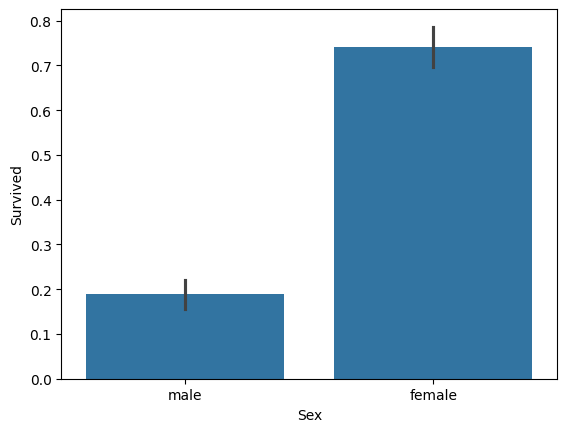

In [10]:
sns.barplot(x='Sex',y='Survived',data=train_df)
train_df.groupby('Sex',as_index=False).Survived.mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


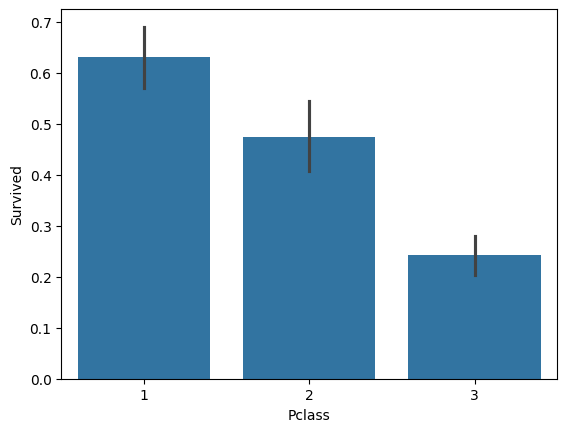

In [11]:
sns.barplot(x='Pclass',y='Survived',data=train_df)
train_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


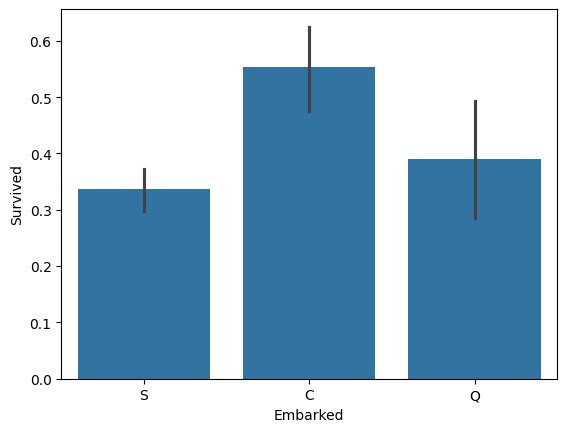

In [12]:
sns.barplot(x='Embarked',y='Survived',data=train_df)
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


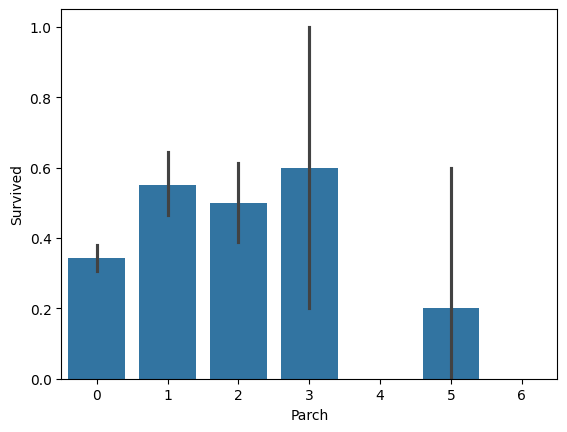

In [13]:
sns.barplot(x='Parch',y='Survived',data=train_df)
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


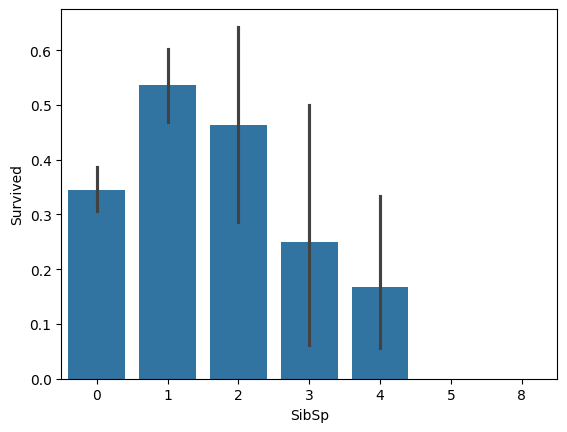

In [14]:
sns.barplot(x='SibSp',y='Survived',data=train_df)
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

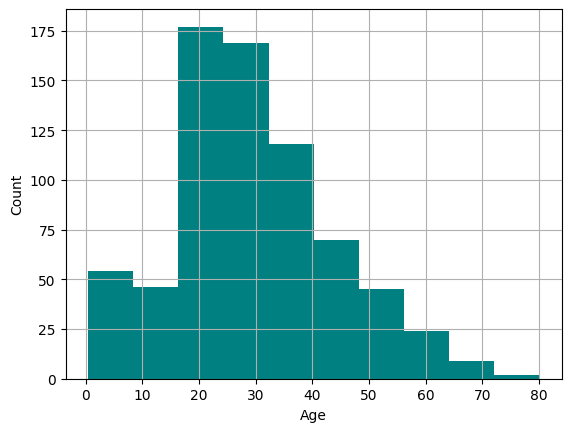

The Median age of passengers is : 28
The Standard Deviation age of passengers is : 14


In [15]:
train_df.Age.hist(bins=10,color='teal')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print("The Median age of passengers is :", int(train_df.Age.median()))
print("The Standard Deviation age of passengers is :", int(train_df.Age.std()))

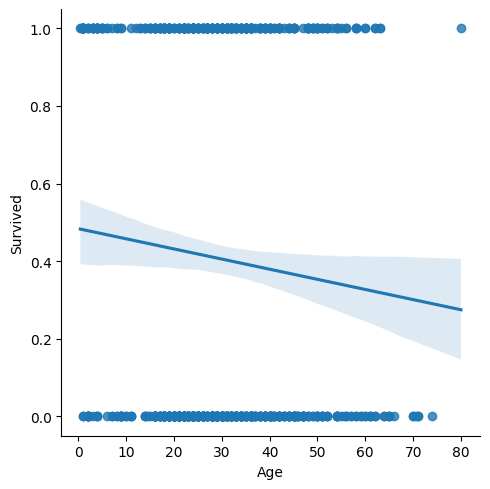

In [16]:
sns.lmplot(x='Age',y='Survived',data=train_df,palette='Set1')

,Sex,Age
0,female,27.0
1,male,29.0


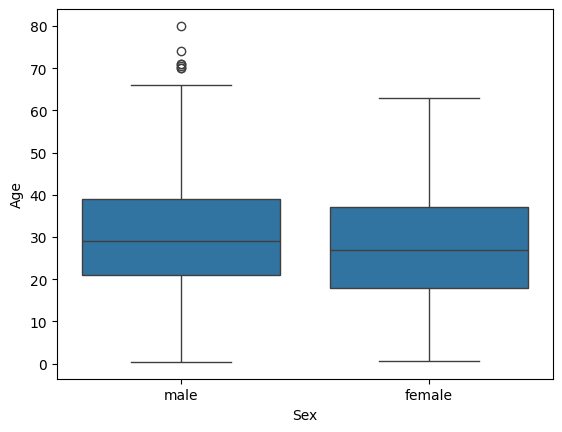

In [17]:
sns.boxplot(x='Sex',y='Age',data=train_df)
train_df.groupby('Sex',as_index=False)['Age'].median()

In [18]:
drop_list=['Cabin','Ticket','PassengerId']
train_df = train_df.drop(drop_list,axis=1)
test_passenger_df = pd.DataFrame(test_df.PassengerId)
test_df = test_df.drop(drop_list,axis=1)
test_passenger_df.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


<Axes: xlabel='count', ylabel='Title'>

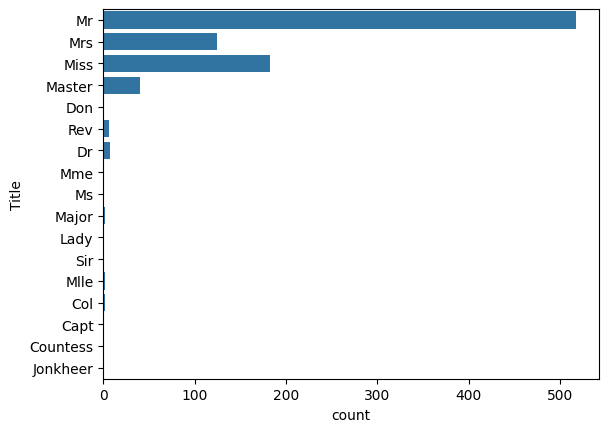

In [19]:
train_df.Embarked.fillna('S',inplace=True)
train_df.Age.fillna(28, inplace=True)
test_df.Age.fillna(28, inplace=True)
test_df.Fare.fillna(test_df.Fare.median(), inplace=True)
Combined_data = [train_df, test_df]
for dataset in Combined_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)  
sns.countplot(y='Title',data=train_df)  

In [20]:
for dataset in Combined_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special')
    dataset['Title'] = dataset['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})
train_df.groupby('Title',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Special,0.347826
2,Mr,0.156673


<Axes: xlabel='count', ylabel='Title'>

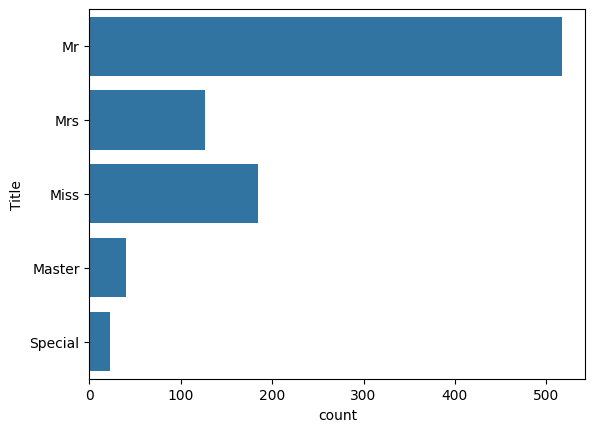

In [21]:
sns.countplot(y='Title',data=train_df)

In [22]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Special": 5}
for dataset in Combined_data:
    dataset['Title'] = dataset.Title.map(title_mapping)
    dataset['Title'] = dataset.Title.fillna(0)

In [23]:
for dataset in Combined_data:
    dataset["Family"] = dataset['SibSp'] + dataset['Parch']
    dataset["IsAlone"] = np.where(dataset["Family"] > 0, 0,1)
    dataset.drop('Family',axis=1,inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1


In [24]:
for dataset in Combined_data:
    dataset.drop(['SibSp','Parch','Name'],axis=1,inplace=True) 

In [25]:
for dataset in Combined_data:
    dataset["IsMinor"] = np.where(dataset["Age"] < 15, 1, 0)

In [26]:
train_df['Old_Female'] = (train_df['Age']>50)&(train_df['Sex']=='female')
train_df['Old_Female'] = train_df['Old_Female'].astype(int)
test_df['Old_Female'] = (test_df['Age']>50)&(test_df['Sex']=='female')
test_df['Old_Female'] = test_df['Old_Female'].astype(int)

In [27]:
train_df2 = pd.get_dummies(train_df,columns=['Pclass','Sex','Embarked'],drop_first=True)
test_df2 = pd.get_dummies(test_df,columns=['Pclass','Sex','Embarked'],drop_first=True)
train_df2.head()

,Survived,Age,Fare,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,0,0,0,False,True,True,False,True
1,1,38.0,71.2833,3,0,0,0,False,False,False,False,False
2,1,26.0,7.9250,2,1,0,0,False,True,False,False,True
3,1,35.0,53.1000,3,0,0,0,False,False,False,False,True
4,0,35.0,8.0500,1,1,0,0,False,True,True,False,True


In [28]:
train_df2['AgeBands'] = pd.qcut(train_df2.Age,4,labels=False) 
test_df2['AgeBands'] = pd.qcut(test_df2.Age,4,labels=False) 

In [29]:
train_df2['FareBand'] = pd.qcut(train_df2.Fare,7,labels=False)
test_df2['FareBand'] = pd.qcut(test_df2.Fare,7,labels=False)

In [30]:
train_df2.drop(['Age','Fare'],axis=1,inplace=True)
test_df2.drop(['Age','Fare'],axis=1,inplace=True)

In [31]:
train_df2.head()

,Survived,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands,FareBand
0,0,1,0,0,0,False,True,True,False,True,0,0
1,1,3,0,0,0,False,False,False,False,False,3,6
2,1,2,1,0,0,False,True,False,False,True,1,1
3,1,3,0,0,0,False,False,False,False,True,2,5
4,0,1,1,0,0,False,True,True,False,True,2,1


In [32]:
#using machine learning operations
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [33]:
X = train_df2.drop("Survived",axis=1) 
y = train_df2["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [34]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_logreg

80.6

In [35]:
cv_scores = cross_val_score(logreg,X,y,cv=5)
np.mean(cv_scores)*100

80.35904839620865

In [36]:
decisiontree = DecisionTreeClassifier()
dep = np.arange(1,10)
param_grid = {'max_depth' : dep}

clf_cv = GridSearchCV(decisiontree, param_grid=param_grid, cv=5)

clf_cv.fit(X, y)
clf_cv.best_params_,clf_cv.best_score_*100
print('Best value of max_depth:',clf_cv.best_params_)
print('Best score:',clf_cv.best_score_*100)

Best value of max_depth: {'max_depth': 4}
Best score: 82.37838177138912


In [37]:
random_forest = RandomForestClassifier()
ne = np.arange(1,20)
param_grid = {'n_estimators' : ne}
rf_cv = GridSearchCV(random_forest, param_grid=param_grid, cv=5)
rf_cv.fit(X, y)
print('Best value of n_estimators:',rf_cv.best_params_)
print('Best score:',rf_cv.best_score_*100)

Best value of n_estimators: {'n_estimators': 10}
Best score: 79.34844014813885


In [38]:
gbk = GradientBoostingClassifier()
ne = np.arange(1,20)
dep = np.arange(1,10)
param_grid = {'n_estimators' : ne,'max_depth' : dep}

gbk_cv = GridSearchCV(gbk, param_grid=param_grid, cv=5)

gbk_cv.fit(X, y)
print('Best value of parameters:',gbk_cv.best_params_)
print('Best score:',gbk_cv.best_score_*100)

Best value of parameters: {'max_depth': 3, 'n_estimators': 16}
Best score: 82.26476680685457
